In [50]:
import numpy as np
import matplotlib.pyplot as plt
import scipy, scipy.signal
%matplotlib notebook

# from scipy.signal import butter, lfilter
# from santolik_methods import santolik_Q, appleton_hartree, ne_ps, gen_rotation_matrix
from santolik_methods import gen_td_whistler, santolik_Q
D2R = np.pi/180.
R2D = 180./np.pi
Hz2Rad = 2.*np.pi
Rad2Hz = 1./Hz2Rad


Q_EL = 1.602e-19
M_EL = 9.1e-31
eo   = 8.854e-12
B0   = 30e-6
c    = 2.998e8
mu   = 4.0*np.pi*10e-7

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook

In [52]:
def plot_td(ex, ey, ez, bx, by, bz, fs):
    tvec = np.arange(0,len(ex),1)/fs
    fig, ax = plt.subplots(3,2, sharex=True, sharey='col')
    ax[0,0].plot(tvec, ex)
    ax[1,0].plot(tvec, ey)
    ax[2,0].plot(tvec, ez)
    ax[0,1].plot(tvec, bx)
    ax[1,1].plot(tvec, by)
    ax[2,1].plot(tvec, bz)
    fig.autofmt_xdate()
    fig.tight_layout()
    ax[0,0].set_title('E')
    ax[0,1].set_title('B')
def plot_spec(ex, ey, ez, bx, by, bz, fs, E_clims = [-12, -4], B_clims = [-20, -15]):
    # --------------- Latex Plot Beautification --------------------------
    fig_width = 8
    fig_height = 6
    fig_size =  [fig_width+1,fig_height+1]
    params = {'backend': 'ps',
              'axes.labelsize': 12,
              'font.size': 12,
              'legend.fontsize': 10,
              'xtick.labelsize': 12,
              'ytick.labelsize': 12,
              'text.usetex': False,
              'figure.figsize': fig_size}
    plt.rcParams.update(params)
    # --------------- Latex Plot Beautification --------------------------
    fig, ax = plt.subplots(3,2,sharex=True,sharey=True)

    # evec = [ex,ey,ez]
    # bvec = [bx,by,bz]
    window = 'hanning'
    nfft = 128
    overlap = 0.5
    c = 2.998e8
    shading = 'flat'
#         shading = 'gouraud'
    # Get spectra
    ff,tt, FBx = scipy.signal.spectrogram(bx, fs=fs, window=window, nperseg=nfft, noverlap=nfft*overlap,mode='complex')
    ff,tt, FBy = scipy.signal.spectrogram(by, fs=fs, window=window, nperseg=nfft, noverlap=nfft*overlap,mode='complex')
    ff,tt, FBz = scipy.signal.spectrogram(bz, fs=fs, window=window, nperseg=nfft, noverlap=nfft*overlap,mode='complex')

    ff,tt, FEx = scipy.signal.spectrogram(1e-3*ex, fs=fs, window=window, nperseg=nfft, noverlap=nfft*overlap,mode='complex')
    ff,tt, FEy = scipy.signal.spectrogram(1e-3*ey, fs=fs, window=window, nperseg=nfft, noverlap=nfft*overlap,mode='complex')
    ff,tt, FEz = scipy.signal.spectrogram(1e-3*ez, fs=fs, window=window, nperseg=nfft, noverlap=nfft*overlap,mode='complex')

    S_mag = np.sqrt(np.real(FEx*np.conj(FEx)))
#     print(np.min(S_mag), np.max(S_mag))
    p = ax[0,0].pcolormesh(tt,ff, np.log10(S_mag), cmap = plt.cm.jet,vmin=E_clims[0],vmax=E_clims[1],shading=shading)
    S_mag = np.sqrt(np.real(FEy*np.conj(FEy)))
#     print(np.min(S_mag), np.max(S_mag))
    p = ax[1,0].pcolormesh(tt,ff, np.log10(S_mag), cmap = plt.cm.jet,vmin=E_clims[0],vmax=E_clims[1],shading=shading)
    # S_mag = np.real(newEz*np.conj(newEz))
    S_mag = np.sqrt(np.real(FEz*np.conj(FEz)))
#     print(np.min(S_mag), np.max(S_mag))
    p = ax[2,0].pcolormesh(tt,ff, np.log10(S_mag), cmap = plt.cm.jet,vmin=E_clims[0],vmax=E_clims[1],shading=shading)

    S_mag = np.sqrt(np.real(FBx*np.conj(FBx)))
#     print(np.min(S_mag), np.max(S_mag))
    p = ax[0,1].pcolormesh(tt,ff, np.log10(S_mag), cmap = plt.cm.jet,vmin=B_clims[0],vmax=B_clims[1],shading=shading)
    S_mag = np.sqrt(np.real(FBy*np.conj(FBy)))
#     print(np.min(S_mag), np.max(S_mag))
    p = ax[1,1].pcolormesh(tt,ff, np.log10(S_mag), cmap = plt.cm.jet,vmin=B_clims[0],vmax=B_clims[1],shading=shading)
    S_mag = np.sqrt(np.real(FBz*np.conj(FBz)))
#     print(np.min(S_mag), np.max(S_mag))
    p = ax[2,1].pcolormesh(tt,ff, np.log10(S_mag), cmap = plt.cm.jet,vmin=B_clims[0],vmax=B_clims[1],shading='gouraud')

    ax[0,0].set_ylim([0,fs/2])
    ax[0,0].set_title('E')
    ax[0,1].set_title('B')
    ax[0,0].set_ylabel('X\nfrequency [hz]')
    ax[1,0].set_ylabel('Y\nfrequency [hz]')
    ax[2,0].set_ylabel('Z\nfrequency [hz]')
    ax[2,0].set_xlabel('Time [sec]')

    return fig

In [53]:
tmax = 0.5 # 0.2 # seconds
fs = 131072 # 2^17 (next power of 2 above 100kHz)

Lshell = 1.3
D = 5#2
theta = 40*D2R
phi = -45*D2R
pol_angle = 0
E_mag = 1

whistler_highcut = 40000
ex, ey, ez, bx, by, bz = gen_td_whistler(Lshell, D, theta, phi, pol_angle, tmax, fs, highcut=whistler_highcut,
                                         E_mag = 10e-3, e_noise_mag=1e-5, b_noise_mag = 1e-15)

# plot_td(tvec, ex, ey, ez, bx, by, bz)
# plot_spec(ex, ey, ez, bx, by, bz, fs)

<IPython.core.display.Javascript object>


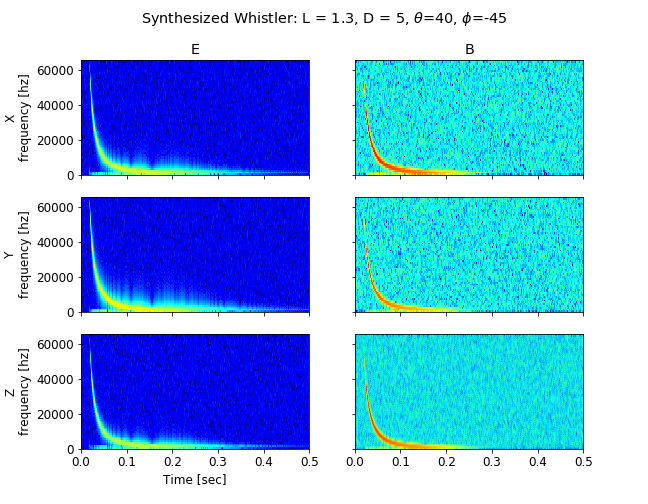

<IPython.core.display.Javascript object>


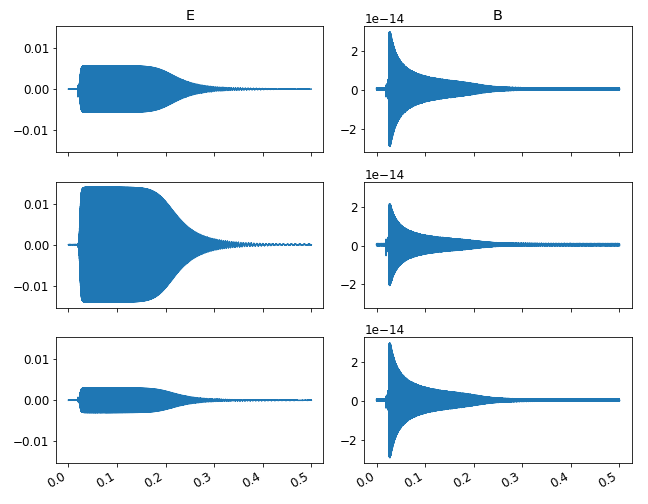

In [54]:
fig = plot_spec(ex, ey, ez, bx, by, bz, fs)
fig.suptitle(r'Synthesized Whistler: L = {0:g}, D = {1:d}, $\theta$={2:g}, $\phi$={3:g}'.format(Lshell, D, R2D*theta, R2D*phi))
fig.savefig('whistler_spec.png')
fig = plot_td(ex, ey, ez, bz, by, bz, fs)

In [21]:
# # Define the frequency bins -- assuming 512 bins for the FFT.
# # These were pulled from the spreadsheet "bin_edges.xlsx"
# start_inds = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 28, 30, 32, 34, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 84, 92, 100, 108, 116, 124, 132, 140, 156, 172, 188, 204, 220, 236, 252, 268, 284, 300, 332, 364, 396, 428]
# stop_inds  = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 23, 25, 27, 29, 31, 33, 35, 39, 43, 47, 51, 55, 59, 63, 67, 71, 75, 83, 91, 99, 107, 115, 123, 131, 139, 155, 171, 187, 203, 219, 235, 251, 267, 283, 299, 331, 363, 395, 427, 511]
# f_pairs = list(zip(start_inds, stop_inds))
# freqs_lin = ff[start_inds]
# trans_bins = {'HWU': [188, 189], 'NWC': [203, 204], 'NPM': [220, 221], 'JJI': [228, 229], 'DHO': [240, 241], 'NAA': [246, 247], 'NLK': [254, 255], 'NML': [259, 260], 'NRK': [385], 'NAU': [418, 419]}


<IPython.core.display.Javascript object>


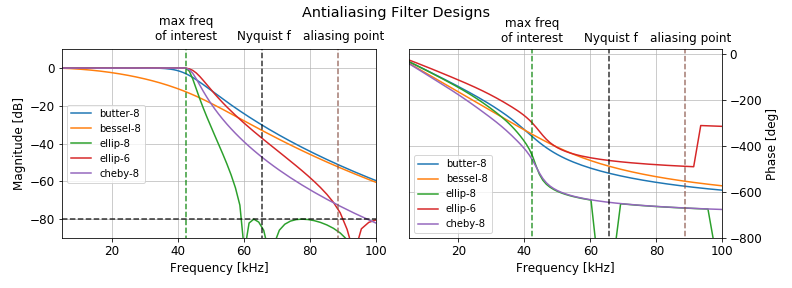

88640.0
butter-8
bessel-8
ellip-8
ellip-6
cheby-8


In [74]:
# Design some filters:
from scipy import signal

# --------------- Latex Plot Beautification --------------------------
fig_width = 10
fig_height = 3
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 12,
          'font.size': 12,
          'legend.fontsize': 10,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------
fig, ax = plt.subplots(1,2, sharex=True)

stopband_atten = 80 # dB
cutoff = Hz2Rad*42432

top_freq_bin = 42432
atten_freq = fs/2 + (fs/2 - top_freq_bin)
print(atten_freq)
filts = ['butter-8','bessel-8','ellip-8','ellip-6','cheby-8']
for filt in filts:
    print(filt)
    if filt == 'butter-8':
        order=8
        b, a = signal.butter(order, cutoff,'low',analog=True)
    if filt == 'bessel-8':
        order = 8
        b, a = signal.bessel(order, cutoff, 'low', analog=True, norm='phase')
    if filt == 'bessel-4':
        order = 4
        b, a = signal.bessel(order, cutoff, 'low', analog=True, norm='phase')
    if filt == 'ellip-8':
        order = 8
        passband_ripple = 0.1 # dB
        b, a = signal.ellip(order, passband_ripple, stopband_atten, cutoff, btype='low', analog=True)
    if filt == 'ellip-6':
        order = 6
        passband_ripple = 0.1 # dB
        b, a = signal.ellip(order, passband_ripple, stopband_atten, cutoff, btype='low', analog=True)
    if filt == 'cheby-8':
        order = 8
        passband_ripple = 0.1 # dB
        b, a = signal.cheby1(order, passband_ripple, cutoff, btype='low', analog=True)
    
    w, h = signal.freqs(b, a)
    ax[0].plot(w*Rad2Hz/1000, 20*np.log10(np.abs(h)), label=filt)
    ax[1].plot(w*Rad2Hz/1000, R2D*np.unwrap(np.angle(h), discont=np.pi*1.2), label=filt)
ax[0].set_xlim([5, 100]) # kHz
# ax[0].set_xscale('log')
ax[0].grid(which='major', alpha = 0.8)
ax[0].grid(which='minor', alpha=0.3)
ax[0].set_ylabel('Magnitude [dB]')
ax[0].set_ylim([-90, 10])
# ax[1].set_xscale('log')
ax[1].yaxis.set_label_position('right')
ax[1].set_ylabel('Phase [deg]')
ax[1].yaxis.tick_right()
ax[1].grid(which='major', alpha = 0.8)
ax[1].grid(which='minor', alpha=0.3)

ax[1].set_ylim([-800,20])
ax[0].plot([fs/2000, fs/2000],[-100, 100],'k--', alpha=0.8)
ax[1].plot([fs/2000, fs/2000],[-1000, 1000],'k--', alpha=0.8)
ax[0].plot([top_freq_bin/1000, top_freq_bin/1000],[-100, 100],'g--', alpha=0.8)
ax[1].plot([top_freq_bin/1000, top_freq_bin/1000],[-1000, 1000],'g--', alpha=0.8)
ax[0].plot([atten_freq/1000, atten_freq/1000],[-100, 100],'--', alpha=0.8)
ax[1].plot([atten_freq/1000, atten_freq/1000],[-1000, 1000],'--', alpha=0.8)
ax[0].legend()
ax[1].legend()


# ax[0].annotate('max freq\nof interest', xy=(top_freq_bin/1000, 10),  xycoords='data',
#             xytext=(0.3, 1.2), textcoords='axes fraction',
#             arrowprops=dict(facecolor='black', shrink=0.01, linewidth=0.5),
#             horizontalalignment='right', verticalalignment='top')

ax[0].text(33, 15, ' max freq\nof interest')
ax[0].text(58, 15, 'Nyquist f')
ax[0].text(78, 15, 'aliasing point')
ax[0].plot([0,100],[-stopband_atten,-stopband_atten],'k--', alpha=0.8)

ax[1].text(33, 50, ' max freq\nof interest')
ax[1].text(58, 50, 'Nyquist f')
ax[1].text(78, 50, 'aliasing point')

ax[0].set_xlabel('Frequency [kHz]')
ax[1].set_xlabel('Frequency [kHz]')
fig.suptitle('Antialiasing Filter Designs')
fig.tight_layout()
fig.savefig('AAF_designs.png')



In [7]:
# Load frequency bins from the excel file
import pandas as pd
xx = pd.read_excel('bin_edges_v2.xlsx')
# print(xx)
start_inds = np.array(xx['bin index (L)']) - 1
start_inds = start_inds[~np.isnan(start_inds)].astype('int')
stop_inds = np.array(xx['bin index (R)']) - 1
stop_inds = stop_inds[~np.isnan(stop_inds)].astype('int')
f_pairs = list(zip(start_inds, stop_inds))
# freqs_lin = ff[start_inds]




NameError: name 'ff' is not defined

<IPython.core.display.Javascript object>


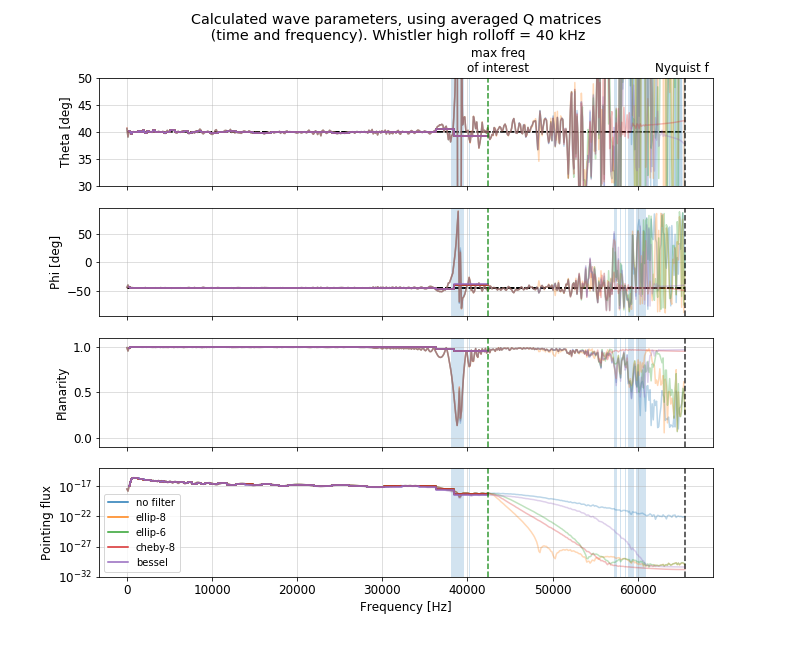

0: no filter
Getting full-resolution Q matrices
Running SVD (full resolution)
Running SVD (frequency-averaged resolution)
(57, 6, 6)
(57, 6, 6)


/Users/austin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:105: ComplexWarning: Casting complex values to real discards the imaginary part


1: ellip-8
Getting full-resolution Q matrices
Running SVD (full resolution)
Running SVD (frequency-averaged resolution)
(57, 6, 6)
(57, 6, 6)
2: ellip-6
Getting full-resolution Q matrices
Running SVD (full resolution)
Running SVD (frequency-averaged resolution)
(57, 6, 6)
(57, 6, 6)
3: cheby-8
Getting full-resolution Q matrices
Running SVD (full resolution)
Running SVD (frequency-averaged resolution)
(57, 6, 6)
(57, 6, 6)
4: bessel
Getting full-resolution Q matrices
Running SVD (full resolution)
Running SVD (frequency-averaged resolution)
(57, 6, 6)
(57, 6, 6)


In [49]:
# Compute FFTs:

# --------------- Latex Plot Beautification --------------------------
fig_width = 10
fig_height = 8
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 12,
          'font.size': 12,
          'legend.fontsize': 10,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------
overlap = 0.5
nfft = 1024
window = 'hanning'

cutoff = 42432
fig, ax = plt.subplots(4,1, sharex=True)

for ind, filt in enumerate(['no filter','ellip-8','ellip-6','cheby-8','bessel']):
    print(f'{ind}: {filt}')
    color=plt.cm.tab10(ind)
    if filt =='no filter':
        ff,tt, FEx = signal.spectrogram(ex, fs=fs, window=window, nperseg=nfft, noverlap=nfft*overlap,mode='complex')
        ff,tt, FEy = signal.spectrogram(ey, fs=fs, window=window, nperseg=nfft, noverlap=nfft*overlap,mode='complex')
        ff,tt, FEz = signal.spectrogram(ez, fs=fs, window=window, nperseg=nfft, noverlap=nfft*overlap,mode='complex')
        ff,tt, FBx = signal.spectrogram(bx, fs=fs, window=window, nperseg=nfft, noverlap=nfft*overlap,mode='complex')
        ff,tt, FBy = signal.spectrogram(by, fs=fs, window=window, nperseg=nfft, noverlap=nfft*overlap,mode='complex')
        ff,tt, FBz = signal.spectrogram(bz, fs=fs, window=window, nperseg=nfft, noverlap=nfft*overlap,mode='complex')
    else:
        if filt == 'bessel':
            order = 10
            sos = signal.bessel(order, cutoff/(fs/2), 'lp', norm='mag', output='sos')
        if filt == 'ellip-8':
            order = 8
            passband_ripple = 0.1 # dB
            stopband_atten = 80
            sos = signal.ellip(order, passband_ripple, stopband_atten, cutoff/(fs/2), 'lp', output='sos')
        if filt == 'ellip-6':
            order = 6
            passband_ripple = 0.1 # dB
            stopband_atten = 80
            sos = signal.ellip(order, passband_ripple, stopband_atten, cutoff/(fs/2), 'lp', output='sos')
        if filt == 'cheby-8':
            order = 8
            passband_ripple = 0.1 # dB
            sos = signal.cheby1(order, passband_ripple, cutoff/(fs/2), 'lp', output='sos')
        # Filter the time-domain data
        # (You could also add some randomness to the SOS values, if you want to explore that)
        ex_filtered = signal.sosfilt(sos, ex)
        ey_filtered = signal.sosfilt(sos, ey)
        ez_filtered = signal.sosfilt(sos, ez)
        bx_filtered = signal.sosfilt(sos, bx)
        by_filtered = signal.sosfilt(sos, by)
        bz_filtered = signal.sosfilt(sos, bz)

        ff,tt, FEx = signal.spectrogram(ex_filtered, fs=fs, window=window, nperseg=nfft, noverlap=nfft*overlap,mode='complex')
        ff,tt, FEy = signal.spectrogram(ey_filtered, fs=fs, window=window, nperseg=nfft, noverlap=nfft*overlap,mode='complex')
        ff,tt, FEz = signal.spectrogram(ez_filtered, fs=fs, window=window, nperseg=nfft, noverlap=nfft*overlap,mode='complex')
        ff,tt, FBx = signal.spectrogram(bx_filtered, fs=fs, window=window, nperseg=nfft, noverlap=nfft*overlap,mode='complex')
        ff,tt, FBy = signal.spectrogram(by_filtered, fs=fs, window=window, nperseg=nfft, noverlap=nfft*overlap,mode='complex')
        ff,tt, FBz = signal.spectrogram(bz_filtered, fs=fs, window=window, nperseg=nfft, noverlap=nfft*overlap,mode='complex')
        
    # Generate the full-resolution Q vector
    # Generate Q matrix, so we can play with it
    print("Getting full-resolution Q matrices")
    Qvec = np.zeros([len(tt), len(ff),6,6],'complex')
    for (ti,fi) in np.ndindex(len(tt), len(ff)):
        z = np.array([c*FBx[fi,ti], c*FBy[fi,ti], c*FBz[fi,ti], FEx[fi,ti], FEy[fi,ti], FEz[fi,ti]],'complex')
        Q = np.outer(z,np.conj(z))
        Qvec[ti,fi] = Q

    # Average in time
    Q_avg = np.mean(Qvec, axis=0)

    print('Running SVD (full resolution)')
    theta_avg = np.zeros([len(ff)])
    phi_avg   = np.zeros([len(ff)])
    plan_avg  = np.zeros([len(ff)])
    power_avg = np.zeros([len(ff)])

    for fi in range(len(ff)):
        Q = Q_avg[fi,:,:]

        # Compute theta, phi, and planarity from Santolik (6x6) method
        theta_avg[fi], phi_avg[fi], plan_avg[fi] = santolik_Q(Q)

        # Compute Poynting flux from Q:    
        power_avg[fi] = np.sqrt(
                        np.abs(Q[1,3] + Q[4,0])**2 +
                        np.abs(Q[0,5] + Q[3,2])**2 +
                        np.abs(Q[2,4] + Q[5,1])**2)/c/mu

    print('Running SVD (frequency-averaged resolution)')
    # Next, average in frequency
    # Compute wave parameters at each bin:
    freqs_lin = ff[start_inds]
    Q_avg_over_freqs = np.zeros([len(f_pairs),6,6])
    print(np.shape(Q_avg_over_freqs))
    for ind, (a, b) in enumerate(f_pairs):
        Q_avg_over_freqs[ind,:,:] = np.mean(Q_avg[a:(b+1),:,:], axis=0)

    theta_freq_avg = np.zeros([len(freqs_lin)])
    phi_freq_avg   = np.zeros([len(freqs_lin)])
    plan_freq_avg  = np.zeros([len(freqs_lin)])
    power_freq_avg = np.zeros([len(freqs_lin)])

    print(np.shape(Q_avg_over_freqs))
    # for (ti,fi) in np.ndindex(len(tt), len(ff)):
    for fi in range(len(f_pairs)):
        Q = Q_avg_over_freqs[fi,:,:]

        # Compute theta, phi, and planarity from Santolik (6x6) method
        theta_freq_avg[fi], phi_freq_avg[fi], plan_freq_avg[fi] = santolik_Q(Q)

        # Compute Poynting flux from Q:    
        power_freq_avg[fi] = np.sqrt(
                        np.abs(Q[1,3] + Q[4,0])**2 +
                        np.abs(Q[0,5] + Q[3,2])**2 +
                        np.abs(Q[2,4] + Q[5,1])**2)/c/mu

        
    freq_edges = np.hstack([freqs_lin, ff[stop_inds[-1]]])
    # Full-resolution plots:
    if True: #filt=='no filter':
        ax[0].plot(ff, R2D*theta_avg, alpha=0.3, color=color)
        ax[1].plot(ff, R2D*phi_avg, alpha=0.3, color=color)
        ax[2].plot(ff, plan_avg, alpha=0.3, color=color)
    ax[3].plot(ff, power_avg, alpha=0.3, color=color)

    # Target lines
    ax[0].plot([ff[0], ff[-1]], [R2D*theta, R2D*theta],'k--', zorder=0)
    ax[1].plot([ff[0], ff[-1]], [R2D*phi, R2D*phi],'k--', zorder=0)

    # Frequency-averaged
    ax[0].plot(freq_edges, R2D*np.hstack([theta_freq_avg, theta_freq_avg[-1]]),
               drawstyle='steps-post', color=color)
    ax[1].plot(freq_edges, R2D*np.hstack([phi_freq_avg, phi_freq_avg[-1]]),
               drawstyle='steps-post', color=color)
    ax[2].plot(freq_edges, np.hstack([plan_freq_avg,plan_freq_avg[-1]]),
               drawstyle='steps-post', color=color)
    ax[3].plot(freq_edges, np.hstack([power_freq_avg, power_freq_avg[-1]]),
               drawstyle='steps-post', color=color, label=filt)


ax[0].set_ylabel('Theta [deg]')
ax[1].set_ylabel('Phi [deg]')
ax[2].set_ylabel('Planarity')
ax[3].set_yscale('log')
ax[3].set_ylabel('Pointing flux')
ax[3].legend()
ax[-1].set_xlabel('Frequency [Hz]')
ax[0].set_ylim([R2D*theta - 10, R2D*theta+10])
ax[1].set_ylim([R2D*phi - 20, R2D*phi + 20])
ax[1].set_ylim([-95,95])
ax[2].set_ylim([-0.1, 1.1])
ax[3].set_ylim([1e-32, 1e-14])
# ax[-1].set_xscale('log')
# ax[-1].set_xlim([20000,50000])
# Mask low-planarity sections:
for a in ax: #[ax[-1]]:
    a.fill_between(ff, a.get_ylim()[0], a.get_ylim()[1], where= plan_avg < 0.8, alpha=0.2)
for a in ax:
    a.grid(which='major', alpha=0.5)
    a.grid(which='minor', alpha=0.3)
    a.plot([fs/2, fs/2],a.get_ylim(),'k--', alpha=0.8)
    a.plot([top_freq_bin, top_freq_bin],a.get_ylim(),'g--', alpha=0.8)

ax[0].text(40e3, 51, ' max freq\nof interest')
ax[0].text(62e3, 51, 'Nyquist f')
# ax[-1].text(45000, ax[-1].get_ylim()[0],'planarity < 0.8')
# ax[0].text(78, 50, 'aliasing point')

fig.suptitle('Calculated wave parameters, using averaged Q matrices\n ' +\
             '(time and frequency). Whistler high rolloff = {0:g} kHz'.format(whistler_highcut/1000))
fig.savefig('algorithm_response_AAF_comparison_40k_rolloff.png')

In [66]:
signal.cheby2?